## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, Pool

# set custom pd settings
pd.set_option('display.max_columns', None)

## Import train and test sets

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,29,0.733,0.921,0.875,0.914,0.509,0.868,0.801,0.996,59,30,0.629,0.678,0.686,82,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159,7,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [4]:
X_test.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,52,0.552,0.897,0.867,0.998,0.877,0.771,0.712,0.649,38,-14,0.747,0.728,0.985,181,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,24,0.803,0.910,0.604,0.804,0.735,0.626,0.844,0.693,59,35,0.629,0.678,0.686,185,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,37,0.846,0.838,0.721,0.610,0.999,0.736,0.840,0.898,62,25,0.590,0.745,0.667,139,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
3,36,0.828,0.663,0.986,0.834,0.761,0.639,0.615,0.623,38,2,0.747,0.728,0.985,196,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4,41,0.753,0.864,0.870,0.450,0.791,0.542,0.948,0.854,25,-16,0.871,0.786,0.771,208,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [5]:
# define a function to plot the auc curve for a model
def plot_auc_curve(clf, title):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # plot
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Baseline LogReg Model (Before Preprocessing)

In [6]:
baseline = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit model
baseline.fit(X_train, y_train.values.ravel())

# predict 
y_pred_test = baseline.predict(X_test)


In [7]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, baseline.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9997973082536079
Area Under Curve: 0.9328818067550582
Confusion Matrix: 
[[123315      0]
 [    25      0]]
Recall score: 0.0


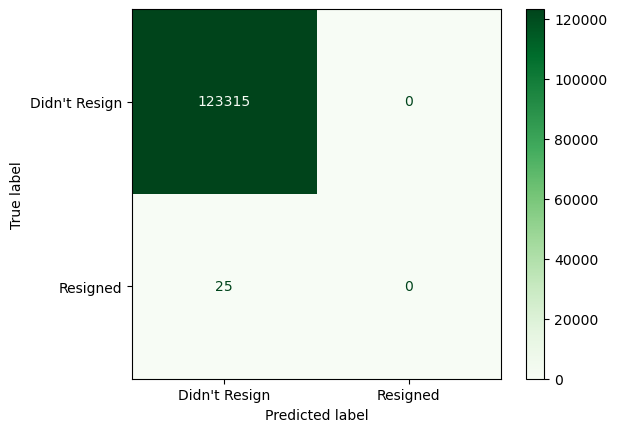

In [8]:
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

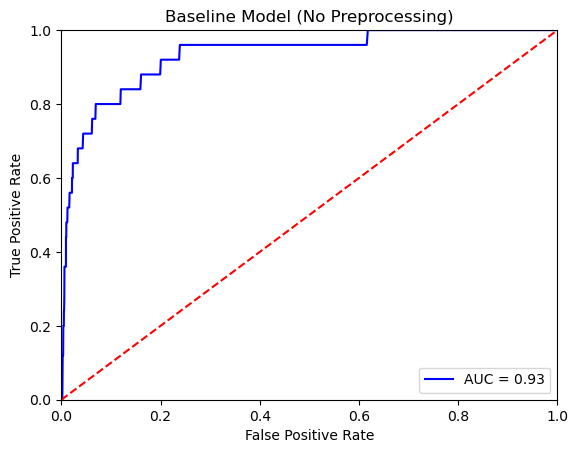

In [9]:
plot_auc_curve(baseline, title="Baseline Model (No Preprocessing)")

There were no accurately predicted positive classes.

## Preprocessing: Random Oversampling of Minority Class (test set only)

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")

# oversample train splits using imbalanced-learn
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [11]:
# Count of oversampled y-training set
print("Oversampled y_train set")
print(y_train_over['Resigned'].value_counts())

# Count of original y_training set
print("Original y-train set")
print(y_train['Resigned'].value_counts())

Oversampled y_train set
0    287742
1    287742
Name: Resigned, dtype: int64
Original y-train set
0    287742
1        51
Name: Resigned, dtype: int64


# LogReg Model After Oversampling

In [12]:
# instantiate model
lr_over = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr_over.fit(X_train_over, y_train_over.values.ravel())

# Predict test values
y_pred_test = lr_over.predict(X_test)

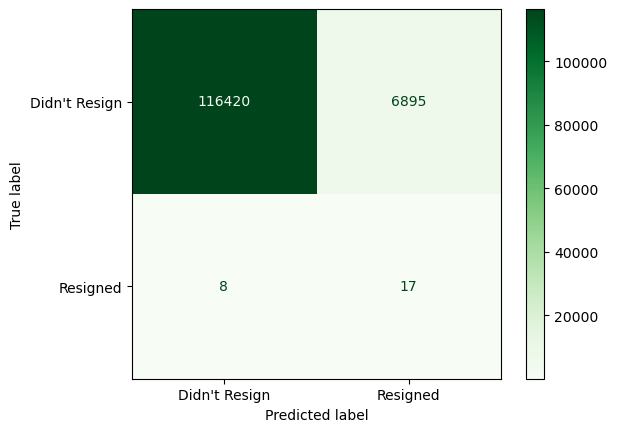

In [13]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [14]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, lr_over.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.944032754986217
Area Under Curve: 0.9048712646474476
Confusion Matrix: 
[[116420   6895]
 [     8     17]]
Recall score: 0.68


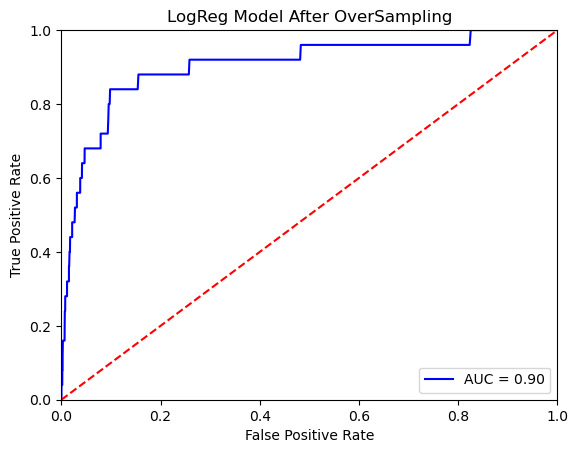

In [15]:
# plot LogReg model with oversampling only
plot_auc_curve(lr_over, title="LogReg Model After OverSampling")

## Preprocessing: Scale Numeric Features 

In [16]:
# Get numeric features
num_features = X_train.select_dtypes(include=['number'], exclude=['datetime']).columns.to_list()
num_features = num_features[:16]

In [17]:
# copy dataframes for scaling only
X_train_scale_copy = X_train.copy()
X_test_scale_copy = X_test.copy()


#instantiate scaler
scaler = StandardScaler()

# fit data
scaler.fit(X_train_scale_copy[num_features])

# transform data
X_train_scale_copy[num_features] = scaler.transform(X_train_scale_copy[num_features])
X_test_scale_copy[num_features] = scaler.transform(X_test_scale_copy[num_features])

# Check mean and std
print(X_train_scale_copy[num_features].mean())
print(X_train_scale_copy[num_features].std())

sub_age                      -5.158843e-17
sub_health_h                 -1.599809e-15
sub_commitment_h              9.872538e-16
sub_perceptiveness_h          1.505484e-15
sub_dexterity_h               7.642100e-16
sub_sociality_h               5.696331e-16
sub_goodness_h                2.436841e-15
sub_strength_h                2.915691e-16
sub_openmindedness_h          4.422421e-16
sup_age                       1.217186e-16
sup_sub_age_diff             -1.681655e-17
sup_commitment_h              1.282958e-15
sup_perceptiveness_h          7.142387e-16
sup_goodness_h                1.002870e-15
Num Underrecorded Efficacy   -1.654188e-17
Num Mismatched Events        -4.948984e-17
dtype: float64
sub_age                       1.000002
sub_health_h                  1.000002
sub_commitment_h              1.000002
sub_perceptiveness_h          1.000002
sub_dexterity_h               1.000002
sub_sociality_h               1.000002
sub_goodness_h                1.000002
sub_strength_h          

In [18]:
X_train_scale_copy.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,-0.900781,-0.087194,1.146760,0.834403,1.151287,-1.413995,0.885453,0.395302,1.505759,1.358019,1.625400,-0.870393,-0.297973,-0.145016,-2.039435,-1.705561,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,-0.828039,0.966553,-1.154434,0.222726,0.227194,-1.383216,0.367993,-0.126152,0.987714,0.292686,0.799915,-0.519407,1.529973,0.170625,0.426173,-0.961556,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,1.208713,0.439679,-0.078287,0.632612,1.479408,-0.570658,0.347567,-1.053855,0.924538,-0.772648,-1.418573,-0.483592,-1.972167,-1.692276,-0.121740,0.526455,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1.572419,0.062412,0.023236,0.210114,0.314246,-1.093896,-1.150344,0.947073,0.406494,-1.056736,-1.882908,0.863049,0.317037,0.381053,0.351457,0.154452,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,1.572419,0.485211,-0.755109,-0.395256,0.193712,0.561998,0.681192,0.025433,-0.623278,-0.630603,-1.573351,0.082284,-1.345768,0.554346,0.002785,-0.589553,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


# Logreg Model After Scaling Only 

In [19]:
# instantiate model
lr_scaled = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr_scaled.fit(X_train_scale_copy, y_train.values.ravel())

# Predict test values
y_pred_test = lr_scaled.predict(X_test)

#### Results

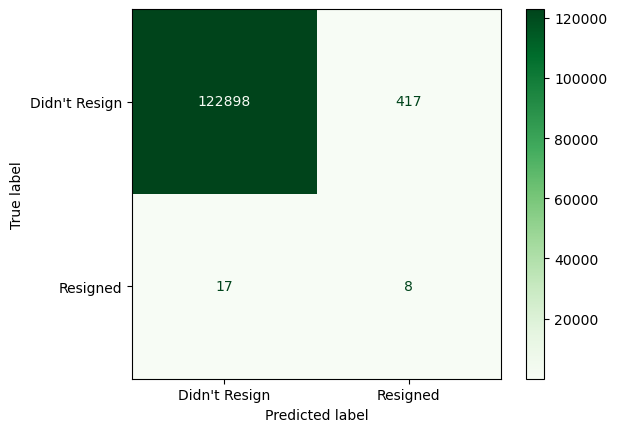

In [20]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [21]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, lr_scaled.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9964812712826334
Area Under Curve: 0.9257936179702387
Confusion Matrix: 
[[122898    417]
 [    17      8]]
Recall score: 0.32


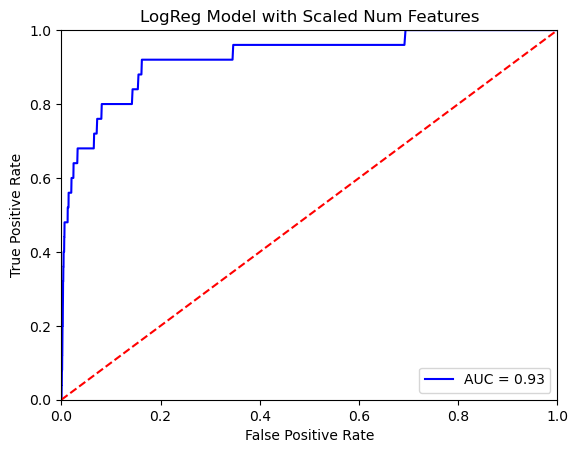

In [22]:
plot_auc_curve(lr_scaled, title='LogReg Model with Scaled Num Features')

# Logistic Regression Model (Oversampling + Scaling)

In [23]:
# Pipeline for oversampling and scaling 
sampling = RandomOverSampler(sampling_strategy="minority")
scaler = StandardScaler()
model = LogisticRegression(solver = 'liblinear', max_iter = 500)

clf = make_pipeline(sampling, scaler, model)
clf.fit(X_train, y_train.values.ravel())

# predict test values
y_pred_test = clf.predict(X_test)

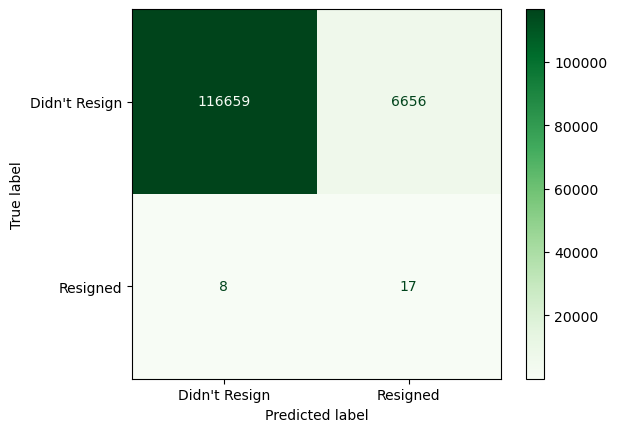

In [24]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [25]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9459704880817253
Area Under Curve: 0.8930277743988971
Confusion Matrix: 
[[116659   6656]
 [     8     17]]
Recall score: 0.68


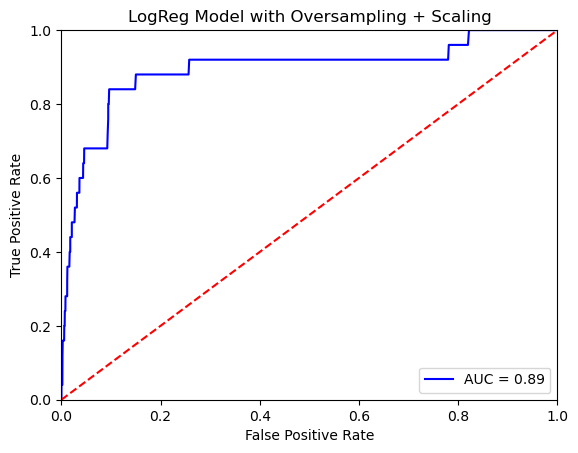

In [26]:
plot_auc_curve(clf, title="LogReg Model with Oversampling + Scaling")

### LogReg Hyperparam tuning:  `penalty`, `C`, and `solver` 

In [ ]:
# crange = np.arange(0.5, 20.0, 0.5)
# hyperparam_grid = {"penalty": ["l1", "l2"]
#                    ,"C": crange,
#                    "solver":['liblinear', 'newton-cholesky']
#                   }

# # Pipeline for oversampling and scaling 
# sampling = RandomOverSampler(sampling_strategy="minority")
# scaler = StandardScaler()
# model = LogisticRegression(solver = 'liblinear', max_iter = 500)
# clf = make_pipeline(sampling, scaler, model)

# # define evaluation procedure
# grid = GridSearchCV(clf, hyperparam_grid, scoring="roc_auc", n_jobs=-1, refit=True)

# grid.fit(X_train, y_train.values.ravel())

# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

### LogReg Model with Optimized Params

In [ ]:
# lg5 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.5, class_weight={0: 0.01, 1: 10}, random_state=13, max_iter=500,)

# lg5.fit(X_train, y_train.values.ravel())

# y_pred = lg5.predict(X_test)

# lg5_score = roc_auc_score(y_test, y_pred)

# # performance
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print('Area Under Curve: ', lg5_score)
# print(f'Recall score: {recall_score(y_test,y_pred)}')

After some hyperparameter tuning, we're left with a significantly improved AUC score however at the expense of a marked drop in accuracy.

In [ ]:
# # Keep track of models and best scores
# model_scores = {'LogReg':round(lg5_score,2)}

### Random Forest Classifier with Oversampling

In [27]:
rf_clf = RandomForestClassifier(max_depth=3)

rf_clf.fit(X_train_over, y_train_over.values.ravel())

RandomForestClassifier(max_depth=3)

In [28]:
preds = rf_clf.predict(X_test)

In [29]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,preds)}')
print(f'Area Under Curve: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, preds)}')
print(f'Recall score: {recall_score(y_test,preds)}')

Accuracy Score: 0.8973325766174801
Area Under Curve: 0.8772460771195718
Confusion Matrix: 
[[110660  12655]
 [     8     17]]
Recall score: 0.68


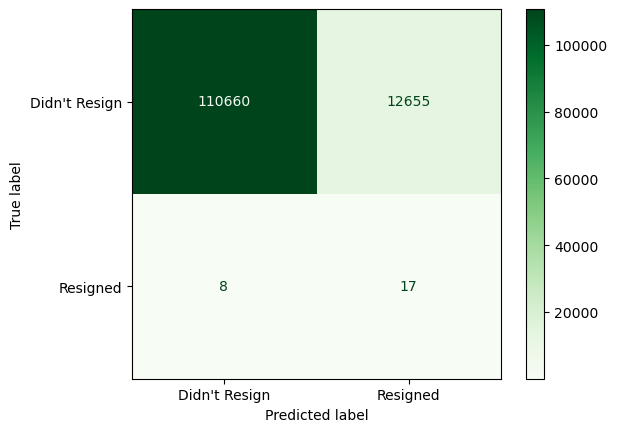

In [30]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=preds, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

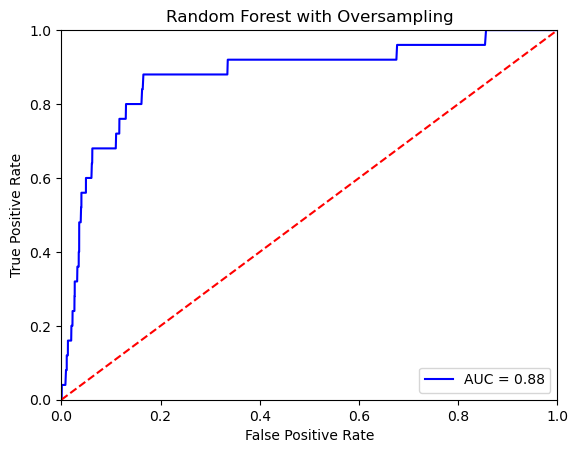

In [31]:
plot_auc_curve(rf_clf, title="Random Forest with Oversampling")

In [50]:
rf_clf.feature_importances_

array([2.04096292e-02, 2.18499055e-02, 1.18042075e-02, 1.17021778e-02,
       1.41336477e-02, 3.52572040e-02, 2.14528115e-02, 1.93008206e-02,
       5.62840434e-03, 5.31256078e-02, 2.70564819e-02, 5.18495859e-02,
       1.60975569e-02, 4.52928040e-02, 3.52836983e-01, 2.12600530e-01,
       2.07181456e-04, 1.15664452e-04, 6.12485553e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.02089833e-03, 4.80180007e-04,
       1.59698584e-03, 3.11076674e-04, 4.26566445e-03, 0.00000000e+00,
       6.21803861e-03, 1.42699708e-03, 3.44872958e-04, 4.85278746e-03,
       0.00000000e+00, 0.00000000e+00, 3.84805214e-04, 0.00000000e+00,
       1.25821140e-02, 7.52701377e-04, 1.07588539e-04, 0.00000000e+00,
       0.00000000e+00, 4.54803995e-04, 2.04407537e-03, 3.17642184e-03,
       3.82748411e-04, 0.00000000e+00, 7.05885072e-04, 0.00000000e+00,
       0.00000000e+00, 2.19791582e-02, 3.99925088e-03, 7.86447940e-03,
       2.31077299e-03, 2.11812143e-04, 7.02253906e-04, 9.62993342e-05,
      

### XGBoost Model with Oversampling

In [32]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'n_estimators':100,
            'alpha': 10,
            'learning_rate': 1.0,
        } 
xgb_model = xgb.XGBClassifier(**params)

# fit the classifier to the training data
xgb_model.fit(X_train_over, y_train_over.values.ravel())

# make predictions on test data
y_pred = xgb_model.predict(X_test)

In [33]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9843603048483865
Area Under Curve: 0.7029688196894133
Confusion Matrix: 
[[121410   1905]
 [    24      1]]
Recall score: 0.04


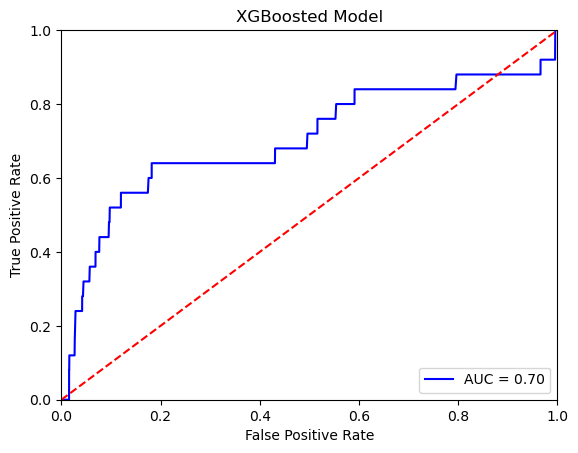

In [34]:
plot_auc_curve(xgb_model, title="XGBoosted Model")

In [36]:
X_train_over.columns

Index(['sub_age', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
       'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
       'sub_strength_h', 'sub_openmindedness_h', 'sup_age', 'sup_sub_age_diff',
       'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h',
       'Num Underrecorded Efficacy', 'Num Mismatched Events', 'sub_sex_F',
       'sub_sex_M', 'sub_shift_Shift 1', 'sub_shift_Shift 2',
       'sub_shift_Shift 3', 'sub_team_Team 1', 'sub_team_Team 10',
       'sub_team_Team 11', 'sub_team_Team 12', 'sub_team_Team 13',
       'sub_team_Team 14', 'sub_team_Team 15', 'sub_team_Team 16',
       'sub_team_Team 17', 'sub_team_Team 18', 'sub_team_Team 19',
       'sub_team_Team 2', 'sub_team_Team 20', 'sub_team_Team 21',
       'sub_team_Team 22', 'sub_team_Team 23', 'sub_team_Team 24',
       'sub_team_Team 3', 'sub_team_Team 4', 'sub_team_Team 5',
       'sub_team_Team 6', 'sub_team_Team 7', 'sub_team_Team 8',
       'sub_team_Team 9', 'sub_team_unassign

## CatBoost Model with Oversampled Data

In [46]:
params = {
    'iterations': 50, 
    'custom_loss' : ['AUC','Accuracy'],
    'train_dir': 'crossentropy',
    'learning_rate': 0.3
}
cat_features = [0,1]
train_dataset = Pool(X_train_over, y_train_over.values.ravel(), feature_names = list(X_train_over.columns))

cb_clf = CatBoostClassifier(**params)

cb_clf.fit(train_dataset, eval_set=(X_test, y_test), verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2634499	test: 0.1431515	best: 0.1431515 (0)	total: 45ms	remaining: 2.21s
1:	learn: 0.1628984	test: 0.1115545	best: 0.1115545 (1)	total: 80.4ms	remaining: 1.93s
2:	learn: 0.1122534	test: 0.0864024	best: 0.0864024 (2)	total: 113ms	remaining: 1.77s
3:	learn: 0.0882479	test: 0.0778871	best: 0.0778871 (3)	total: 154ms	remaining: 1.77s
4:	learn: 0.0776265	test: 0.0777016	best: 0.0777016 (4)	total: 190ms	remaining: 1.71s
5:	learn: 0.0702045	test: 0.0746634	best: 0.0746634 (5)	total: 228ms	remaining: 1.67s
6:	learn: 0.0588131	test: 0.0658011	best: 0.0658011 (6)	total: 265ms	remaining: 1.63s
7:	learn: 0.0549075	test: 0.0654016	best: 0.0654016 (7)	total: 299ms	remaining: 1.57s
8:	learn: 0.0483940	test: 0.0597722	best: 0.0597722 (8)	total: 333ms	remaining: 1.51s
9:	learn: 0.0464221	test: 0.0598947	best: 0.0597722 (8)	total: 366ms	remaining: 1.46s
10:	learn: 0.0435930	test: 0.0589215	best: 0.0589215 (10)	total: 399ms	remaining: 1.42s
11:	learn: 0.0408699	test: 0.0569874	best: 0.0569874

In [49]:
cb_important_features = cb_clf.get_feature_importance(prettified=True).head(5)

In [ ]:
## Make a Table to compare 

In [ ]:
## Do Final Report